Imports

In [121]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, naive_bayes, neighbors, ensemble
from sklearn.model_selection import train_test_split, cross_val_score

Carregamento do CSV

In [122]:
array = pd.read_csv("./arquivos-IA/treinamento.csv")

* Pre-processamento:
   - Remoção de variáveis (Sexo e ID)

In [127]:
X = array.iloc[:, 2:]

    - Alterar variáveis para inteiro:

In [128]:
X.loc[X.Dependentes == '3+', 'Dependentes'] = 3

In [129]:
X.Educacao = pd.Categorical(X.Educacao).codes

X[['Casado', 'Autonomo']] = X[['Casado', 'Autonomo']].fillna("Nao", inplace=False)
X_na = X[['ValorEmprestimo', 'Adimplente', 'Prazo', 'Dependentes']]
X[['ValorEmprestimo', 'Adimplente', 'Prazo', 'Dependentes']] = X_na.fillna(0, inplace=False)

X.Autonomo = pd.Categorical(X.Autonomo).codes
X.Casado = pd.Categorical(X.Casado).codes

y = np.ravel(sk.preprocessing.LabelBinarizer().fit_transform(X.Concedido))
X = X.drop('Concedido', axis=1)

X = pd.get_dummies(X, columns=['AreaPropriedade'])
X_scaled = sk.preprocessing.scale(X)

Pre-Processamento

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=13)

Ajuste e Validação dos Modelos

In [131]:
svc = svm.SVC()
SVCscores = cross_val_score(svc, X_train, y_train, cv=10)
print("SVC F1-Score: %0.2f (+/- %0.2f)" % (SVCscores.mean(), 2*SVCscores.std()))

SVC F1-Score: 0.77 (+/- 0.07)


In [132]:
bag = ensemble.BaggingClassifier()
BAGscores = cross_val_score(bag, X_train, y_train, cv=10, scoring='f1')
print("BAG F1-Score: %0.2f (+/- %0.2f)" % (BAGscores.mean(), 2*BAGscores.std()))

BAG F1-Score: 0.78 (+/- 0.08)


In [133]:
bnb = naive_bayes.BernoulliNB()
BNBscores = cross_val_score(bnb, X_train, y_train, cv=10, scoring='f1')
print("BNB F1-Score: %0.2f (+/- %0.2f)" % (BNBscores.mean(), 2*BNBscores.std()))

KNN F1-Score: 0.83 (+/- 0.07)


Teste dos modelos

In [134]:
svcFit = svc.fit(X_train, y_train)
bagFit = bag.fit(X_train, y_train)
bnbFit = bnb.fit(X_train, y_train)

svcScores = svcFit.score(X_test, y_test)
bagScores = bagFit.score(X_test, y_test)
bnbScores = bnbFit.score(X_test, y_test)

svcScores, bagScores, knnScores

(0.7837837837837838, 0.7351351351351352, 0.7351351351351352)

Curvas ROC

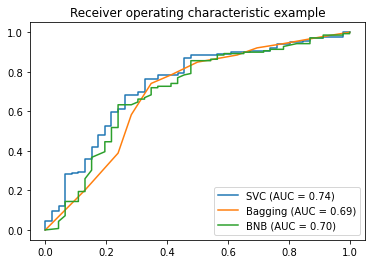

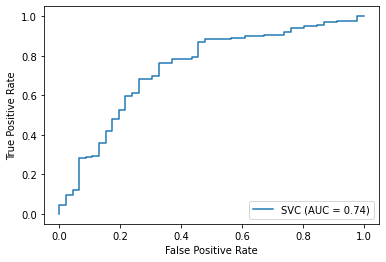

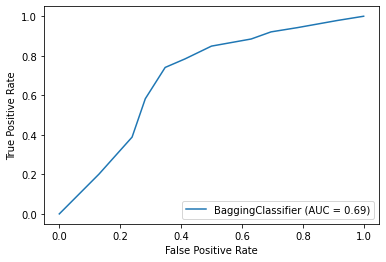

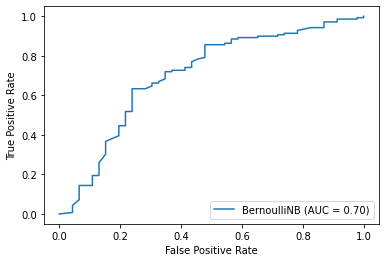

In [137]:
fig, ax = plt.subplots()

vizSVC = sk.metrics.plot_roc_curve(svcFit, X_test, y_test);
ax.plot(vizSVC.fpr, vizSVC.tpr, label=r'SVC (AUC = %0.2f)' % (vizSVC.roc_auc));
vizBAG = sk.metrics.plot_roc_curve(bagFit, X_test, y_test);
ax.plot(vizBAG.fpr, vizBAG.tpr, label=r'Bagging (AUC = %0.2f)' % (vizBAG.roc_auc));
vizBNB = sk.metrics.plot_roc_curve(bnbFit, X_test, y_test);
ax.plot(vizBNB.fpr, vizBNB.tpr, label=r'BNB (AUC = %0.2f)' % (vizBNB.roc_auc));
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="Receiver operating characteristic example");
ax.legend(loc="lower right");